In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\analytics\data\Messy_Employee_dataset.csv")
df.head()

,Employee_ID,First_Name,Last_Name,Age,Department_Region,Status,Join_Date,Salary,Email,Phone,Performance_Score,Remote_Work
0,EMP1000,Bob,Davis,25.0,DevOps-California,Active,4/2/2021,59767.65,bob.davis@example.com,-1651623197,Average,True
1,EMP1001,Bob,Brown,NaN,Finance-Texas,Active,7/10/2020,65304.66,bob.brown@example.com,-1898471390,Excellent,True
2,EMP1002,Alice,Jones,NaN,Admin-Nevada,Pending,12/7/2023,88145.90,alice.jones@example.com,-5596363211,Good,True
3,EMP1003,Eva,Davis,25.0,Admin-Nevada,Inactive,11/27/2021,69450.99,eva.davis@example.com,-3476490784,Good,True
4,EMP1004,Frank,Williams,25.0,Cloud Tech-Florida,Active,1/5/2022,109324.61,frank.williams@example.com,-1586734256,Poor,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employee_ID        1020 non-null   object 
 1   First_Name         1020 non-null   object 
 2   Last_Name          1020 non-null   object 
 3   Age                809 non-null    float64
 4   Department_Region  1020 non-null   object 
 5   Status             1020 non-null   object 
 6   Join_Date          1020 non-null   object 
 7   Salary             996 non-null    float64
 8   Email              1020 non-null   object 
 9   Phone              1020 non-null   int64  
 10  Performance_Score  1020 non-null   object 
 11  Remote_Work        1020 non-null   bool   
dtypes: bool(1), float64(2), int64(1), object(8)
memory usage: 88.8+ KB


In [4]:
df.describe()

,Age,Salary,Phone
count,809.000000,996.000000,1.020000e+03
mean,32.484549,85155.056396,-4.942253e+09
std,5.656860,19873.727918,2.817326e+09
min,25.000000,50047.320000,-9.994973e+09
25%,25.000000,68392.487500,-7.341992e+09
50%,30.000000,85547.870000,-4.943997e+09
75%,40.000000,100974.027500,-2.520391e+09
max,40.000000,119971.650000,-3.896086e+06


In [5]:
df.shape

(1020, 12)

In [6]:
df.isnull().sum()/len(df)*100

Employee_ID           0.000000
First_Name            0.000000
Last_Name             0.000000
Age                  20.686275
Department_Region     0.000000
Status                0.000000
Join_Date             0.000000
Salary                2.352941
Email                 0.000000
Phone                 0.000000
Performance_Score     0.000000
Remote_Work           0.000000
dtype: float64

In [7]:
df.columns

Index(['Employee_ID', 'First_Name', 'Last_Name', 'Age', 'Department_Region',
       'Status', 'Join_Date', 'Salary', 'Email', 'Phone', 'Performance_Score',
       'Remote_Work'],
      dtype='object')

In [8]:
df['Employee_ID'].value_counts()


Employee_ID
EMP2019    1
EMP1000    1
EMP1001    1
EMP1002    1
EMP1003    1
          ..
EMP1016    1
EMP1015    1
EMP1014    1
EMP1013    1
EMP1012    1
Name: count, Length: 1020, dtype: int64

### Filling Missing Value :

In [9]:
df['Age'].unique()


array([25., nan, 40., 30., 35.])

In [8]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [11]:
df['Age'].unique()


array([25.        , 32.48454883, 40.        , 30.        , 35.        ])

In [9]:
df['Salary'] = df['Salary'].fillna(df['Salary'].median())
df['Salary']

0        59767.65
1        65304.66
2        88145.90
3        69450.99
4       109324.61
          ...    
1015     85547.87
1016    100215.06
1017    114587.11
1018     71318.79
1019     77764.24
Name: Salary, Length: 1020, dtype: float64

In [20]:
df.isnull().sum()


Employee_ID          0
First_Name           0
Last_Name            0
Age                  0
Department_Region    0
Status               0
Join_Date            0
Salary               0
Email                0
Phone                0
Performance_Score    0
Remote_Work          0
dtype: int64

### Check for Duplicates :

In [10]:
df[df.duplicated()]

,Employee_ID,First_Name,Last_Name,Age,Department_Region,Status,Join_Date,Salary,Email,Phone,Performance_Score,Remote_Work


### Changing Data Types :

In [11]:
df = df.astype({'Age': 'int', 'Phone': 'string'})

In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Employee_ID        1020 non-null   object        
 1   First_Name         1020 non-null   object        
 2   Last_Name          1020 non-null   object        
 3   Age                1020 non-null   int64         
 4   Department_Region  1020 non-null   object        
 5   Status             1020 non-null   object        
 6   Join_Date          1020 non-null   datetime64[ns]
 7   Salary             1020 non-null   float64       
 8   Email              1020 non-null   object        
 9   Phone              1020 non-null   string        
 10  Performance_Score  1020 non-null   object        
 11  Remote_Work        1020 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(7), string(1)
memory usage: 88.8+ KB


### Changing Column Names in lower_case :

In [12]:
df.columns = df.columns.str.lower()

In [13]:
df.columns

Index(['employee_id', 'first_name', 'last_name', 'age', 'department_region',
       'status', 'join_date', 'salary', 'email', 'phone', 'performance_score',
       'remote_work'],
      dtype='object')

In [14]:
df = df.rename(columns = {'email':'email_address','phone':'phone_number'})

In [37]:
df.columns


Index(['employee_id', 'first_name', 'last_name', 'age', 'department_region',
       'status', 'join_date', 'salary', 'email_address', 'phone_number',
       'performance_score', 'remote_work'],
      dtype='object')

In [15]:
df.head(2)

,employee_id,first_name,last_name,age,department_region,status,join_date,salary,email_address,phone_number,performance_score,remote_work
0,EMP1000,Bob,Davis,25,DevOps-California,Active,4/2/2021,59767.65,bob.davis@example.com,-1651623197,Average,True
1,EMP1001,Bob,Brown,32,Finance-Texas,Active,7/10/2020,65304.66,bob.brown@example.com,-1898471390,Excellent,True


In [16]:
df.describe()

,age,salary
count,1020.000000,1020.000000
mean,32.384314,85164.299069
std,5.041082,19638.385740
min,25.000000,50047.320000
25%,30.000000,68811.232500
50%,32.000000,85547.870000
75%,35.000000,100372.662500
max,40.000000,119971.650000


In [17]:
df['age']

0       25
1       32
2       32
3       25
4       25
        ..
1015    30
1016    30
1017    40
1018    30
1019    30
Name: age, Length: 1020, dtype: int64

### Checking if any Outliers in Salary Column :

In [18]:
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)

In [19]:
IQR = Q3 - Q1

In [20]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [22]:
outliers = df[(df['salary'] < lower_bound) | (df['salary'] > upper_bound)]
print(outliers)

Empty DataFrame
Columns: [employee_id, first_name, last_name, age, department_region, status, join_date, salary, email_address, phone_number, performance_score, remote_work]
Index: []


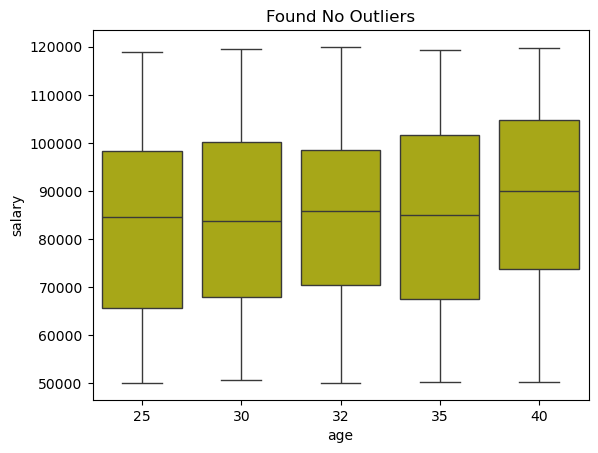

In [39]:
sns.boxplot(data=df, x='age', y= 'salary', color='y')
plt.title('Found No Outliers')
plt.show()

## Showing Some relationship using Seaborn :


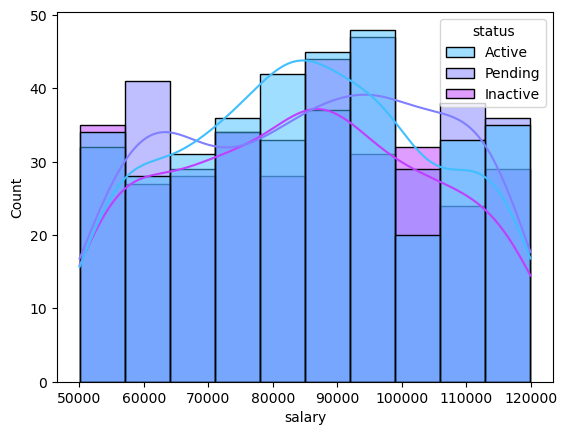

In [28]:
sns.histplot(data=df, x='salary', hue='status', palette='cool', bins=10, kde=True)
plt.show()

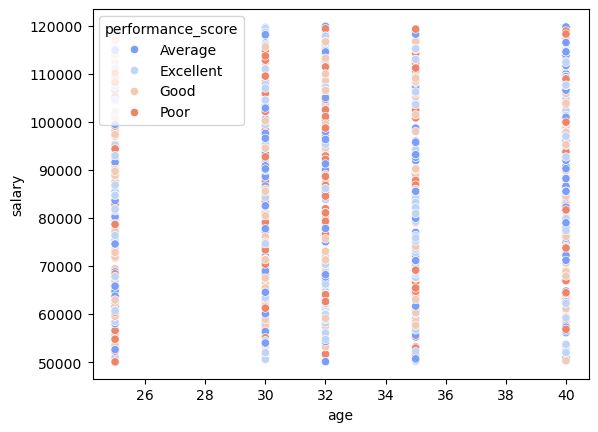

In [34]:
sns.scatterplot(data=df, x='age', y='salary', hue='performance_score', palette='coolwarm')
plt.show()

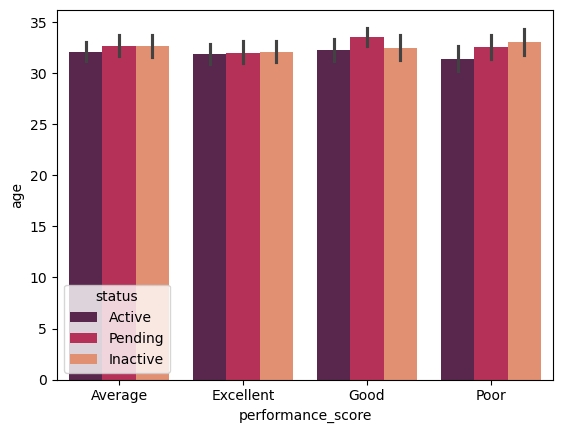

In [38]:
sns.barplot(data=df, x='performance_score', y='age', hue='status', palette='rocket')
plt.show()

In [46]:
df[(df['performance_score']=='Excellent') & (df['status']=='Active')].nlargest(5, 'salary', keep='first')


,employee_id,first_name,last_name,age,department_region,status,join_date,salary,email_address,phone_number,performance_score,remote_work
716,EMP1716,Alice,Williams,32,Admin-California,Active,9/7/2021,118907.61,alice.williams@example.com,-4546553584,Excellent,True
86,EMP1086,Bob,Miller,35,DevOps-Illinois,Active,6/18/2024,118869.10,bob.miller@example.com,-7725199662,Excellent,True
951,EMP1951,Charlie,Brown,30,HR-New York,Active,9/23/2020,118677.67,charlie.brown@example.com,-5100462775,Excellent,False
129,EMP1129,Grace,Brown,40,DevOps-Nevada,Active,10/11/2022,117537.71,grace.brown@example.com,-9594652169,Excellent,False
270,EMP1270,Grace,Miller,30,DevOps-New York,Active,3/18/2023,116374.36,grace.miller@example.com,-4143637188,Excellent,False
